# Linear Regression - Class Exercise 3

## Introduction


## Metadata (Data Dictionary)

| Variable | Data Type | Description |
|----------|-----------|-------------|
| age | int | Age of the customer |
| sex | string | Gender of the customer |
| bmi | float | Body mass index of the customer |
| children | int | Number of children that the customer has |
| smoker | string | Wether the customer is a smoker or not |
| region | string | Region of residence of the customer |
| charges | float | Charges incurred |


# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Import Data

<font color=red><b>Action</b>: Load the data file and check against the metadata.

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Analysis

### Check the numeric summary of each column

<font color=red><b>Action</b>: Display the basic numeric summary.

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Get a list of non-numeric features
We are getting features that appear in the raw file but not in df.describe(), as df.describe() lists all numeric features

<font color=red><b>Action</b>: Create a list that contains the name of non-numeric columns.

In [4]:
non_numeric_features = [feature for feature in list(df) if feature not in list(df.describe())]
non_numeric_features

['sex', 'smoker', 'region']

### Display the unique values and the counts for each non-numeric features

In [5]:
for non_numeric_feature in non_numeric_features:
    print('=== {} ==='.format(non_numeric_feature))
    display(df[non_numeric_feature].value_counts())

=== sex ===


sex
male      676
female    662
Name: count, dtype: int64

=== smoker ===


smoker
no     1064
yes     274
Name: count, dtype: int64

=== region ===


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### Convert "sex" and "smoker" to numeric type
    Sex: 'male' -> 0, 'female' -> 1
    Smoker: 'no' -> 0, 'yes' -> 1

<font color=red><b>Action</b>: For "sex" column, convert "male" to 0 and "female" to 1

In [6]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


<font color=red><b>Action</b>: For "smoker" column, convert "no" to 0 and "yes" to 1.

In [7]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


### Convert "region" to numeric type
As "region" consists of only "south"/"north" and "east"/"west", we can just create 2 features to denote them

    'northwest' -> south = 0, east = 0
    'northeast' -> south = 0, east = 1
    'southwest' -> south = 1, east = 0
    'southeast' -> south = 1, east = 1
    
We can use the "in" operator to check if a string contains a certain piece of string.

<font color=red><b>Action 1</b>: Create a column called "south", it takes 1, if "region" is "southwest" or "southeast", or 0 otherwise<br>
<b>Action 2</b>: Create a column called "east", it takes 1, if "region" is "northeast" or "southeast", or 0 otherwise

In [8]:
df['south'] = df['region'].map(lambda x: int('south' in x))
df['east'] = df['region'].map(lambda x: int('east' in x))
df

,age,sex,bmi,children,smoker,region,charges,south,east
0,19,1,27.900,0,1,southwest,16884.92400,1,0
1,18,0,33.770,1,0,southeast,1725.55230,1,1
2,28,0,33.000,3,0,southeast,4449.46200,1,1
3,33,0,22.705,0,0,northwest,21984.47061,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0,0
1334,18,1,31.920,0,0,northeast,2205.98080,0,1
1335,18,1,36.850,0,0,southeast,1629.83350,1,1
1336,21,1,25.800,0,0,southwest,2007.94500,1,0


### Extract the features and the label
Take note that, "region" should be excluded as we have created new features to represent it.

<font color=red><b>Action 1</b>: Set the column name of the label as "label".<br>
<b>Action 2</b>: Create a list that contains the names of columns to be used as input features.

In [9]:
label = 'charges'
excluded_features = [label, 'region']
features = [feature for feature in list(df) if feature not in excluded_features]
features

['age', 'sex', 'bmi', 'children', 'smoker', 'south', 'east']

# Split the data into the training set and the test set
### Import train_test_split from sklearn library

In [10]:
from sklearn.model_selection import train_test_split

### split the data by 80-20 ratio
Set test_size = 0.2 (so the training size would be 0.8)<br>
Set random_state = 0 (this will ensure that the random split will be the same if we re-run the whole script)

<font color=red><b>Action</b>: Split the full DataFrame into the training set and the test set.</font>

In [11]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
display(train_df.head())
display(test_df.head())

,age,sex,bmi,children,smoker,region,charges,south,east
621,37,0,34.100,4,1,southwest,40182.24600,1,0
194,18,0,34.430,0,0,southeast,1137.46970,1,1
240,23,1,36.670,2,1,northeast,38511.62830,0,1
1168,32,0,35.200,2,0,southwest,4670.64000,1,0
1192,58,1,32.395,1,0,northeast,13019.16105,0,1


,age,sex,bmi,children,smoker,region,charges,south,east
578,52,0,30.200,1,0,southwest,9724.53000,1,0
610,47,1,29.370,1,0,southeast,8547.69130,1,1
569,48,0,40.565,2,1,northwest,45702.02235,0,0
1034,61,0,38.380,0,0,northwest,12950.07120,0,0
198,51,1,18.050,0,0,northwest,9644.25250,0,0


### Split the training/test set into the training/test features and label

<font color=red><b>Action</b>: Extract the features and the label for the training set and the test set, respectively.

In [12]:
train_x = train_df[features]
train_y = train_df[label]

test_x = test_df[features]
test_y = test_df[label]

### Build a linear regression model and evaluate by root mean squared error (RMSE)

<font color=red><b>Action 1</b>: Initialize a linear regression model<br>
<b>Action 2</b>: Train the model by the training features and the train label<br>
<b>Action 3</b>: Predict the training label and the test label<br>
<b>Action 4</b>: Compute the training RMSE and the test RMSE

In [13]:
model = LinearRegression()
model.fit(train_x, train_y)

train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

train_RMSE = metrics.mean_squared_error(train_y, train_yhat) ** 0.5
test_RMSE = metrics.mean_squared_error(test_y, test_yhat) ** 0.5
print(train_RMSE, test_RMSE)

6140.9988517264055 5643.009326981731


### Plot the predicted values (on y-axis) against the actual value (on x-axis)
We can set the color to blue for the training set and to red for the test set.

<font color=red><b>Action</b>: Plot the predicted label against the actual label for the training set and the test set respectively

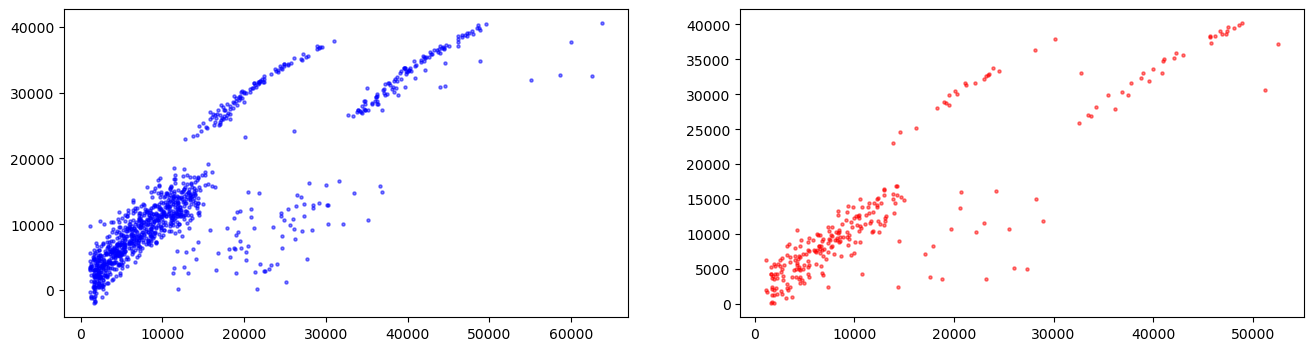

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].scatter(train_y, train_yhat, color='blue', s=5, alpha=0.5)
ax[1].scatter(test_y, test_yhat, color='red', s=5, alpha=0.5)
plt.show()

### Formulate Interaction
Refer to Tutorial 2.2 if you're not familiar with this process

<font color=red><b>Action</b>: Formulate the interaction terms and add into the DataFrame

In [15]:
interaction_features = ['age', 'sex', 'bmi', 'children', 'smoker']

for i in range(len(interaction_features)):
    for j in range(i+1, len(interaction_features)):
        feature1 = interaction_features[i]
        feature2 = interaction_features[j]
        df['{}_{}'.format(feature1, feature2)] = df[feature1] * df[feature2]

df

,age,sex,bmi,children,smoker,region,charges,south,east,age_sex,age_bmi,age_children,age_smoker,sex_bmi,sex_children,sex_smoker,bmi_children,bmi_smoker,children_smoker
0,19,1,27.900,0,1,southwest,16884.92400,1,0,19,530.100,0,19,27.90,0,1,0.00,27.90,0
1,18,0,33.770,1,0,southeast,1725.55230,1,1,0,607.860,18,0,0.00,0,0,33.77,0.00,0
2,28,0,33.000,3,0,southeast,4449.46200,1,1,0,924.000,84,0,0.00,0,0,99.00,0.00,0
3,33,0,22.705,0,0,northwest,21984.47061,0,0,0,749.265,0,0,0.00,0,0,0.00,0.00,0
4,32,0,28.880,0,0,northwest,3866.85520,0,0,0,924.160,0,0,0.00,0,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0,0,0,1548.500,150,0,0.00,0,0,92.91,0.00,0
1334,18,1,31.920,0,0,northeast,2205.98080,0,1,18,574.560,0,0,31.92,0,0,0.00,0.00,0
1335,18,1,36.850,0,0,southeast,1629.83350,1,1,18,663.300,0,0,36.85,0,0,0.00,0.00,0
1336,21,1,25.800,0,0,southwest,2007.94500,1,0,21,541.800,0,0,25.80,0,0,0.00,0.00,0


### Extract the features and the label (again)

<font color=red><b>Action</b>: Create a list that contains the names of columns to be used as input features.

In [16]:
label = 'charges'
excluded_features = [label, 'region']
features = [feature for feature in list(df) if feature not in excluded_features]
features

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'south',
 'east',
 'age_sex',
 'age_bmi',
 'age_children',
 'age_smoker',
 'sex_bmi',
 'sex_children',
 'sex_smoker',
 'bmi_children',
 'bmi_smoker',
 'children_smoker']

<font color=red><b>Action</b>: Regenerate the training set and the test set.

In [17]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
test_df

,age,sex,bmi,children,smoker,region,charges,south,east,age_sex,age_bmi,age_children,age_smoker,sex_bmi,sex_children,sex_smoker,bmi_children,bmi_smoker,children_smoker
578,52,0,30.200,1,0,southwest,9724.53000,1,0,0,1570.400,52,0,0.000,0,0,30.200,0.000,0
610,47,1,29.370,1,0,southeast,8547.69130,1,1,47,1380.390,47,0,29.370,1,0,29.370,0.000,0
569,48,0,40.565,2,1,northwest,45702.02235,0,0,0,1947.120,96,48,0.000,0,0,81.130,40.565,2
1034,61,0,38.380,0,0,northwest,12950.07120,0,0,0,2341.180,0,0,0.000,0,0,0.000,0.000,0
198,51,1,18.050,0,0,northwest,9644.25250,0,0,51,920.550,0,0,18.050,0,0,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,62,1,30.495,2,0,northwest,15019.76005,0,0,62,1890.690,124,0,30.495,2,0,60.990,0.000,0
726,41,0,28.405,1,0,northwest,6664.68595,0,0,0,1164.605,41,0,0.000,0,0,28.405,0.000,0
1132,57,0,40.280,0,0,northeast,20709.02034,0,1,0,2295.960,0,0,0.000,0,0,0.000,0.000,0
725,30,1,39.050,3,1,southeast,40932.42950,1,1,30,1171.500,90,30,39.050,3,1,117.150,39.050,3


Theoractically speaking, if we keep random_state the same, we should have the same training/test set.<br>
But it would be a good habit to check it with the previous test_df.<br>
We can look at the indices and see if they are the same.

<font color=red><b>Action</b>: Regenerate the features and the label for the training set and the test set, respectively.

In [18]:
train_x = train_df[features]
train_y = train_df[label]

test_x = test_df[features]
test_y = test_df[label]

### Re-build the linear regression model

<font color=red><b>Action 1</b>: Initialize a linear regression model<br>
<b>Action 2</b>: Train the model by the training features and the train label<br>
<b>Action 3</b>: Predict the training label and the test label<br>
<b>Action 4</b>: Compute the training RMSE and the test RMSE

In [19]:
model = LinearRegression()
model.fit(train_x, train_y)

train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

train_RMSE = metrics.mean_squared_error(train_y, train_yhat) ** 0.5
test_RMSE = metrics.mean_squared_error(test_y, test_yhat) ** 0.5
print(train_RMSE, test_RMSE)

4921.846552113941 4419.535864079936


We can see that RMSE is reduced with the presence of interaction terms.

# Convert the label to a normal distribution
Linear regression model likes to predict labels that is normally distributed.

We can use histogram to visualize the distribution of "charges".

<font color=red><b>Action</b>: Plot a histogram for "charges"

<Axes: >

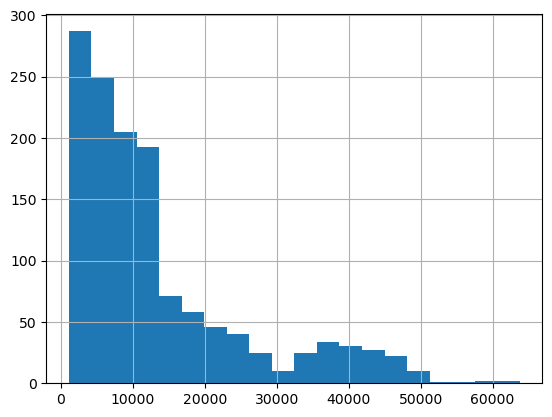

In [20]:
df['charges'].hist(bins=20)

This is not a normal distribution for sure.

### Use np.log() function to scale the label

<font color=red><b>Action</b>: Apply log transform to "charges" as a new column called "log_charges"

In [21]:
df['log_charges'] = np.log(df['charges'])

<font color=red><b>Action</b>: Plot a histogram for "log_charges"

<Axes: >

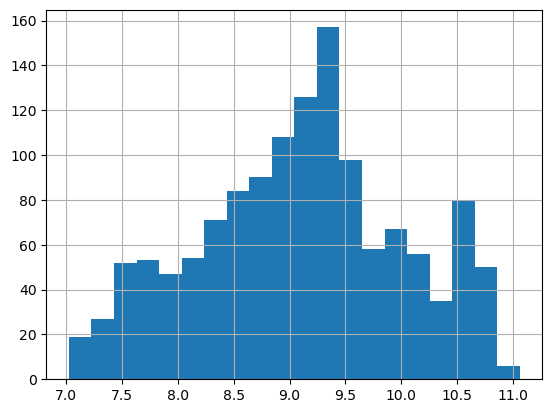

In [22]:
df['log_charges'].hist(bins=20)

Now, the label looks more like a normal distribution.

### Extract the features and the label (again)

<font color=red><b>Action</b>: Update the label and the feature set

In [23]:
label = 'log_charges'
excluded_features = [label, 'region', 'charges']
features = [feature for feature in list(df) if feature not in excluded_features]
features

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'south',
 'east',
 'age_sex',
 'age_bmi',
 'age_children',
 'age_smoker',
 'sex_bmi',
 'sex_children',
 'sex_smoker',
 'bmi_children',
 'bmi_smoker',
 'children_smoker']

<font color=red><b>Action</b>: Regenerate the training set and the test set.<br>

In [24]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
test_df

,age,sex,bmi,children,smoker,region,charges,south,east,age_sex,age_bmi,age_children,age_smoker,sex_bmi,sex_children,sex_smoker,bmi_children,bmi_smoker,children_smoker,log_charges
578,52,0,30.200,1,0,southwest,9724.53000,1,0,0,1570.400,52,0,0.000,0,0,30.200,0.000,0,9.182407
610,47,1,29.370,1,0,southeast,8547.69130,1,1,47,1380.390,47,0,29.370,1,0,29.370,0.000,0,9.053417
569,48,0,40.565,2,1,northwest,45702.02235,0,0,0,1947.120,96,48,0.000,0,0,81.130,40.565,2,10.729898
1034,61,0,38.380,0,0,northwest,12950.07120,0,0,0,2341.180,0,0,0.000,0,0,0.000,0.000,0,9.468857
198,51,1,18.050,0,0,northwest,9644.25250,0,0,51,920.550,0,0,18.050,0,0,0.000,0.000,0,9.174117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,62,1,30.495,2,0,northwest,15019.76005,0,0,62,1890.690,124,0,30.495,2,0,60.990,0.000,0,9.617122
726,41,0,28.405,1,0,northwest,6664.68595,0,0,0,1164.605,41,0,0.000,0,0,28.405,0.000,0,8.804578
1132,57,0,40.280,0,0,northeast,20709.02034,0,1,0,2295.960,0,0,0.000,0,0,0.000,0.000,0,9.938325
725,30,1,39.050,3,1,southeast,40932.42950,1,1,30,1171.500,90,30,39.050,3,1,117.150,39.050,3,10.619678


<font color=red><b>Action</b>: Regenerate the features and the label for the training set and the test set, respectively.

In [25]:
train_x = train_df[features]
train_y = train_df[label]

test_x = test_df[features]
test_y = test_df[label]

### Re-build the linear regression model

<font color=red><b>Action 1</b>: Initialize a linear regression model<br>
<b>Action 2</b>: Train the model by the training features and the train label<br>
<b>Action 3</b>: Predict the training label and the test label<br>
<b>Action 4</b>: Compute the training RMSE and the test RMSE

In [26]:
model = LinearRegression()
model.fit(train_x, train_y)

train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

train_RMSE = metrics.mean_squared_error(train_y, train_yhat) ** 0.5
test_RMSE = metrics.mean_squared_error(test_y, test_yhat) ** 0.5
print(train_RMSE, test_RMSE)

0.3824474887628993 0.33611933645629505


<font color=red><b>Action</b>: Plot the predicted label against the actual label for the training set and the test set respectively

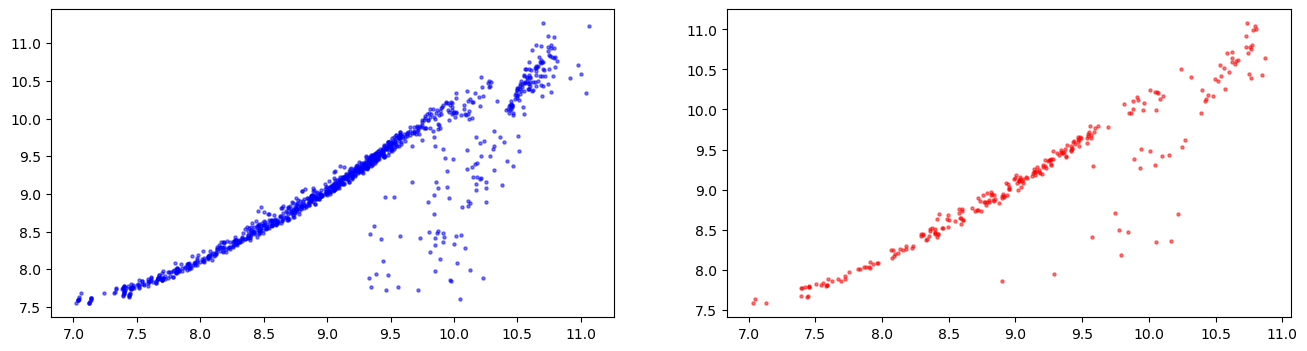

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].scatter(train_y, train_yhat, color='blue', s=5, alpha=0.5)
ax[1].scatter(test_y, test_yhat, color='red', s=5, alpha=0.5)
plt.show()

### Record the metrics

In [28]:
performance_record = []
performance_record.append(['Linear Regression', train_RMSE, test_RMSE])
pd.DataFrame(performance_record, columns=['model', 'train_RMSE', 'test_RMSE'])

,model,train_RMSE,test_RMSE
0,Linear Regression,0.382447,0.336119


### Build a ridge regression model

In [29]:
from sklearn.linear_model import Ridge

For ridge regression, we need to set a value for alpha. This is the weight of the penalty term.

<font color=red><b>Action 1</b>: Initialize a ridge regression model with alpha=1<br>
<b>Action 2</b>: Train the model by the training features and the train label<br>
<b>Action 3</b>: Predict the training label and the test label<br>
<b>Action 4</b>: Compute the training RMSE and the test RMSE<br>
<b>Action 5</b>: Add the performance metrics to the record<br>

In [30]:
model2 = Ridge(alpha=1)
model2.fit(train_x, train_y)

train_yhat = model2.predict(train_x)
test_yhat = model2.predict(test_x)

train_RMSE = metrics.mean_squared_error(train_y, train_yhat) ** 0.5
test_RMSE = metrics.mean_squared_error(test_y, test_yhat) ** 0.5

performance_record.append(['Ridge (1)', train_RMSE, test_RMSE])

We can try another alpha value

<font color=red><b>Action 1</b>: Initialize a ridge regression model with alpha=3<br>
<b>Action 2</b>: Train the model by the training features and the train label<br>
<b>Action 3</b>: Predict the training label and the test label<br>
<b>Action 4</b>: Compute the training RMSE and the test RMSE<br>
<b>Action 5</b>: Add the performance metrics to the record<br>

In [31]:
model3 = Ridge(alpha=3)
model3.fit(train_x, train_y)

train_yhat = model3.predict(train_x)
test_yhat = model3.predict(test_x)

train_RMSE = metrics.mean_squared_error(train_y, train_yhat) ** 0.5
test_RMSE = metrics.mean_squared_error(test_y, test_yhat) ** 0.5

performance_record.append(['Ridge (3)', train_RMSE, test_RMSE])

We can take a look at the record as of now.

In [32]:
pd.DataFrame(performance_record, columns=['model', 'train_RMSE', 'test_RMSE'])

,model,train_RMSE,test_RMSE
0,Linear Regression,0.382447,0.336119
1,Ridge (1),0.382815,0.337140
2,Ridge (3),0.384334,0.339612


### Build a lasso regression model

Similar to ridge regression, we need to set a value for alpha for lasso regression, too.

In [33]:
from sklearn.linear_model import Lasso

<font color=red><b>Action 1</b>: Initialize a lasso regression model with alpha=1<br>
<b>Action 2</b>: Train the model by the training features and the train label<br>
<b>Action 3</b>: Predict the training label and the test label<br>
<b>Action 4</b>: Compute the training RMSE and the test RMSE<br>
<b>Action 5</b>: Add the performance metrics to the record<br>

In [34]:
model4 = Lasso(alpha=1)
model4.fit(train_x, train_y)

train_yhat = model4.predict(train_x)
test_yhat = model4.predict(test_x)

train_RMSE = metrics.mean_squared_error(train_y, train_yhat) ** 0.5
test_RMSE = metrics.mean_squared_error(test_y, test_yhat) ** 0.5

performance_record.append(['Lasso (1)', train_RMSE, test_RMSE])

We can try another alpha value

<font color=red><b>Action 1</b>: Initialize a lasso regression model with alpha=3<br>
<b>Action 2</b>: Train the model by the training features and the train label<br>
<b>Action 3</b>: Predict the training label and the test label<br>
<b>Action 4</b>: Compute the training RMSE and the test RMSE<br>
<b>Action 5</b>: Add the performance metrics to the record<br>

In [35]:
model5 = Lasso(alpha=3)
model5.fit(train_x, train_y)

train_yhat = model5.predict(train_x)
test_yhat = model5.predict(test_x)

train_RMSE = metrics.mean_squared_error(train_y, train_yhat) ** 0.5
test_RMSE = metrics.mean_squared_error(test_y, test_yhat) ** 0.5

performance_record.append(['Lasso (3)', train_RMSE, test_RMSE])

# Interpret the result

In [36]:
pd.DataFrame(performance_record, columns=['model', 'train_RMSE', 'test_RMSE'])

,model,train_RMSE,test_RMSE
0,Linear Regression,0.382447,0.336119
1,Ridge (1),0.382815,0.337140
2,Ridge (3),0.384334,0.339612
3,Lasso (1),0.475875,0.453051
4,Lasso (3),0.560038,0.523790


The linear regression model performs the best in both the training set and the test set.<br>
It shows the model does not suffer from overfitting.<br>
Hence, using regularization term to reduce the model complexity will compromise the performance.

# Run multiple models in a single cell

<font color=red><b>Action 1</b>: Define a dictionary with the model name as the key and the model as the value<br>
<b>Action 2</b>: Loop over each key to initialize the model, train the model, compute the performance metrics and add to the record<br>

In [37]:
models = {'Linear Regression': LinearRegression(),
          'Ridge (1)': Ridge(alpha=1),
          'Ridge (3)': Ridge(alpha=3),
          'Ridge (5)': Ridge(alpha=5),
          'Lasso (1)': Lasso(alpha=1),
          'Lasso (3)': Lasso(alpha=3)}

performance_record = []

for model_name in models.keys():
    model = models[model_name]
    model.fit(train_x, train_y)

    train_yhat = model.predict(train_x)
    test_yhat = model.predict(test_x)
    
    train_RMSE = metrics.mean_squared_error(train_y, train_yhat) ** 0.5
    test_RMSE = metrics.mean_squared_error(test_y, test_yhat) ** 0.5
    
    performance_record.append([model_name, train_RMSE, test_RMSE])
    
pd.DataFrame(performance_record, columns=['model', 'train_RMSE', 'test_RMSE'])

,model,train_RMSE,test_RMSE
0,Linear Regression,0.382447,0.336119
1,Ridge (1),0.382815,0.337140
2,Ridge (3),0.384334,0.339612
3,Ridge (5),0.385839,0.341784
4,Lasso (1),0.475875,0.453051
5,Lasso (3),0.560038,0.523790
